In [1]:
# Steps 
'''
 1. Data Understanding  
 2. Data cleansing & Transformation
 3. Univariate Analysis
 4. Segmented Univariate Analysis
 5. MultiVariate Analysis
'''

'\n 1. Data Understanding  \n 2. Data cleansing & Transformation\n 3. Univariate Analysis\n 4. Segmented Univariate Analysis\n 5. MultiVariate Analysis\n'

In [2]:
# importing all the libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")
# Display all rows
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
# load the loan data into dataframe with pandas API 
loan_df = pd.read_csv("./data/loan.csv")
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# check the shape of data 
loan_df.shape

(39717, 111)

In [6]:
# check for missing values and data type in the dataset 
loan_df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# Remove all the columns which contains all the null value
loan_df.dropna(axis=1 , how='all', inplace=True)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
loan_df.shape

(39717, 57)

In [9]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
columns = ['member_id','emp_title','url','desc','title','zip_code','delinq_2yrs','earliest_cr_line','inq_last_6mths',
           'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp',
           'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
           'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','last_credit_pull_d','application_type']

loan_df.drop(columns,axis=1,inplace=True)
loan_df.head()
# Shape of the dataframe after removing columns
#print(loan_df.shape)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


In [11]:
loan_df.shape # 26

(39717, 27)

In [12]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [13]:
# Check data before cleanup
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0


### Data Cleansing and Transformation

In [14]:
#loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: str(x).replace('%','')).astype('float')

loan_df["emp_length"]=loan_df["emp_length"].apply(lambda x: str(x).replace('years','').replace('+','').replace('< 1','0.5').replace('year',''))

# strip the extra spaces form it 
loan_df['term'] = loan_df['term'].apply(lambda x: x.strip())

#creating new column 'month' and 'year' from 'issue_d' column
#converting to date type
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df["issue_year"] = loan_df.issue_d.dt.year
loan_df['issue_month'] = loan_df.issue_d.dt.strftime('%b')

loan_df['approved_loan_amt_percent'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)

In [15]:
# Remove loans with status as Current
loan_df = loan_df[loan_df.loan_status != "Current"]
loan_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [16]:
# checking for missing value 
(loan_df.isna().sum()/len(loan_df.index))*100

id                            0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
initial_list_status           0.000000
collections_12_mths_ex_med    0.145164
policy_code                   0.000000
acc_now_delinq                0.000000
chargeoff_within_12_mths      0.145164
delinq_amnt                   0.000000
pub_rec_bankruptcies     

### Outlier finding

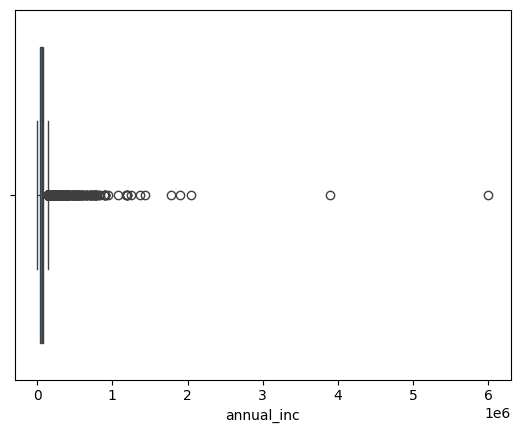

In [17]:
sns.boxplot(x= loan_df['annual_inc'])
plt.show()

In [18]:
loan_df.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [19]:
loan_df.annual_inc.quantile([0.9,.95,.97,.98,.099])

0.900    115000.0
0.950    140004.0
0.970    165000.0
0.980    187000.0
0.099     30000.0
Name: annual_inc, dtype: float64

In [20]:
#removing the values after 95 percentile
percent = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= percent]

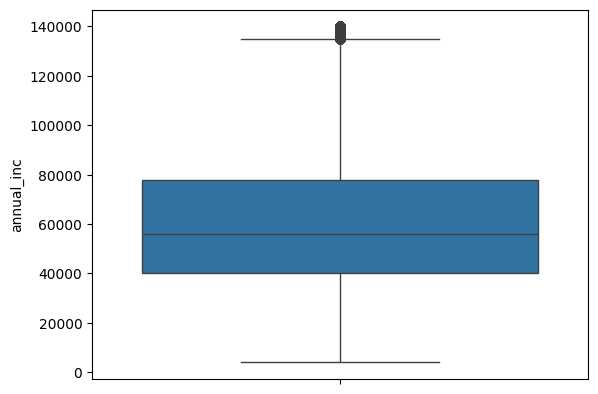

In [21]:
sns.boxplot(loan_df.annual_inc)
plt.show()

## Univariate Analysis

loan_status
Fully Paid     85.21853
Charged Off    14.78147
Name: count, dtype: float64


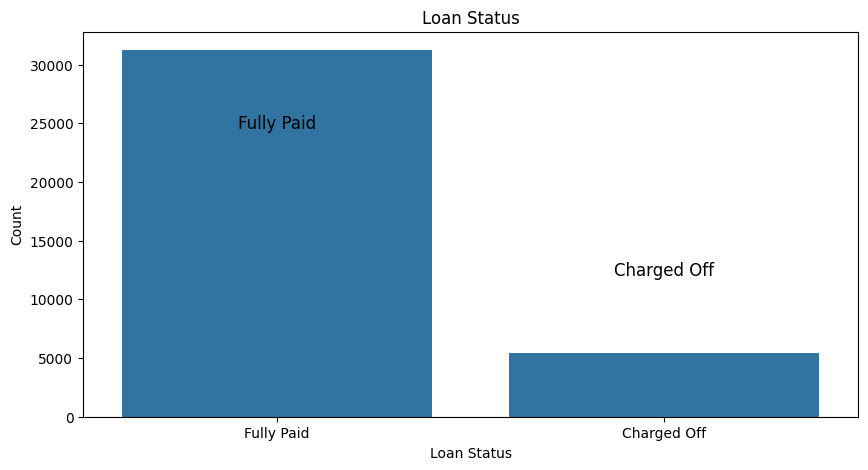

In [22]:
# Loan status 
print(loan_df.loan_status.value_counts()*100/loan_df.loan_status.count())
# 0=Fully Paid, 1=Charged Off

# Plot the distribution of loan statuses (vertical bars)
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=loan_df, x='loan_status')

# Annotate the plot with vertical orientation
ax.annotate('Fully Paid', xy=(0, loan_df['loan_status'].value_counts().max() * 0.8), 
            xycoords='data', horizontalalignment='center', 
            verticalalignment='center', fontsize=12, color='black')
ax.annotate('Charged Off', xy=(1, loan_df['loan_status'].value_counts().max() * 0.4), 
            xycoords='data', horizontalalignment='center', 
            verticalalignment='center', fontsize=12, color='black')

ax.set_title('Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Count')
plt.show()

* Insights:Defaulted loan are low in numbers compared to Fully Paid.

#### Let's examine the distribution of the loan amount, funded amount, and investor-funded amount using a distribution plot.

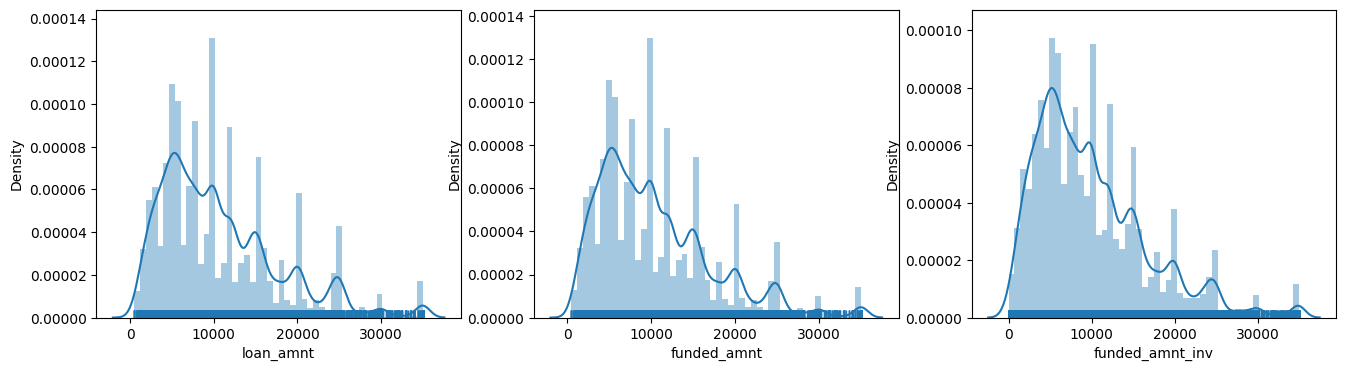

In [22]:
#Setting up the figure size of the plot
plt.figure(figsize=(16,4))

#Setting subplot index
plt.subplot(1,3,1)

#Distribution plot
sns.distplot(loan_df['loan_amnt'],rug = True)

#Setting subplot index
plt.subplot(1,3,2)

#Distribution plot
sns.distplot(loan_df['funded_amnt'],rug = True)

#Setting subplot index
plt.subplot(1,3,3)

#Distribution plot
sns.distplot(loan_df['funded_amnt_inv'],rug = True)
plt.show()

* Insight: From above, we can say that amount distribution looks very similar. So we can use loan_amnt for our further analysis.

#### Analyzing Approved Loan Amount percentage

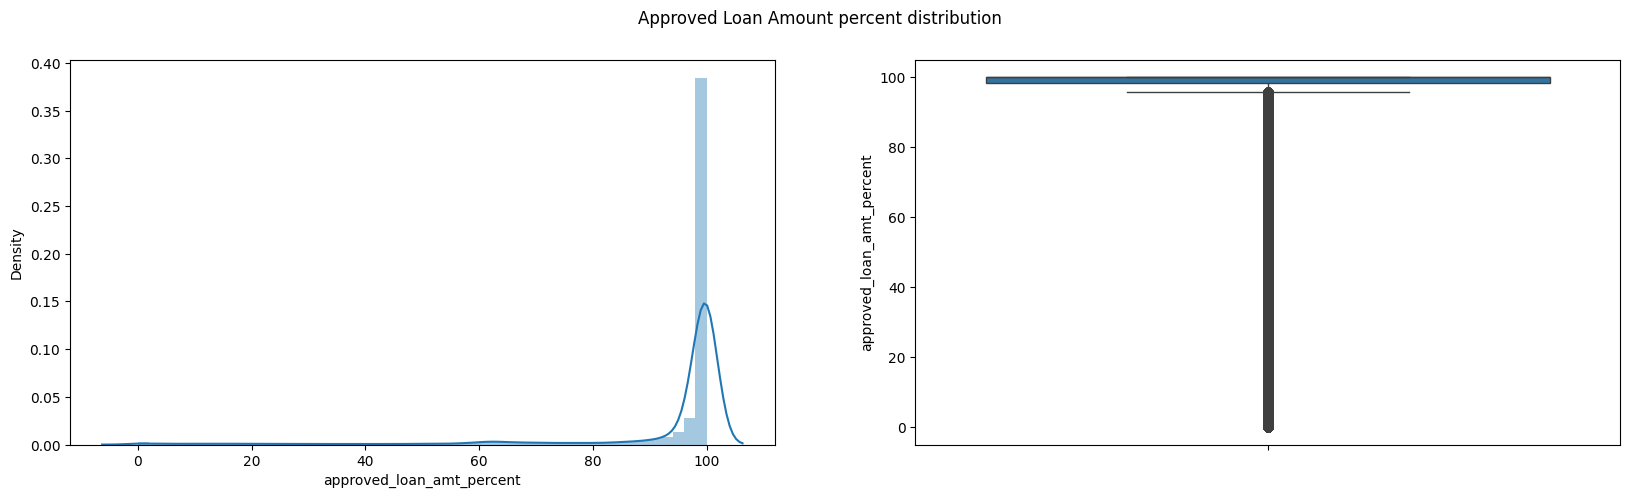

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=loan_df.approved_loan_amt_percent)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.approved_loan_amt_percent)
plt.suptitle('Approved Loan Amount percent distribution')
plt.show()

* Insights: 80% of Borrowers got 100% loan amount from investors.

### Analyzing Loan amount

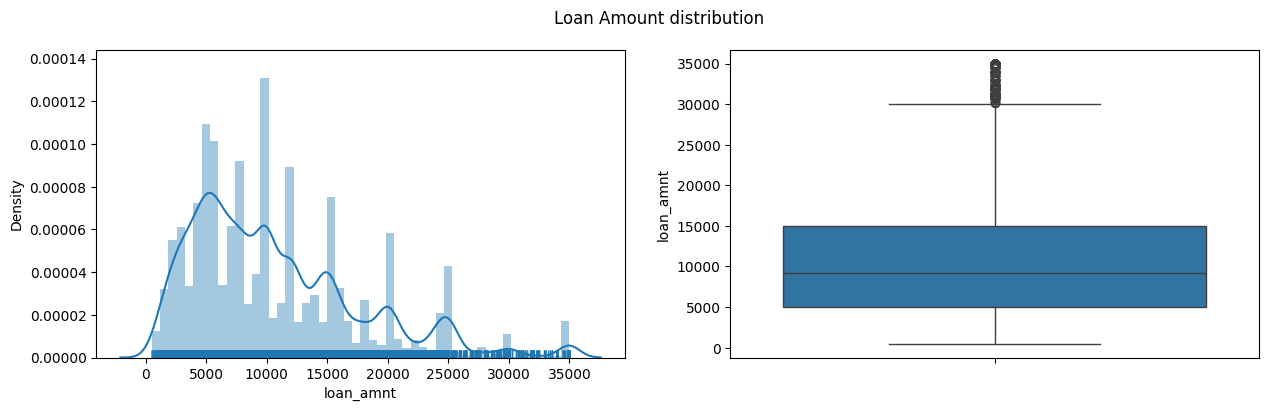

In [24]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=loan_df.loan_amnt, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=loan_df.loan_amnt)

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

* Insights: From loan amount data, we can say that most of them have taken their loan between 5000 and 15000.

### Analyzing Interest Rate

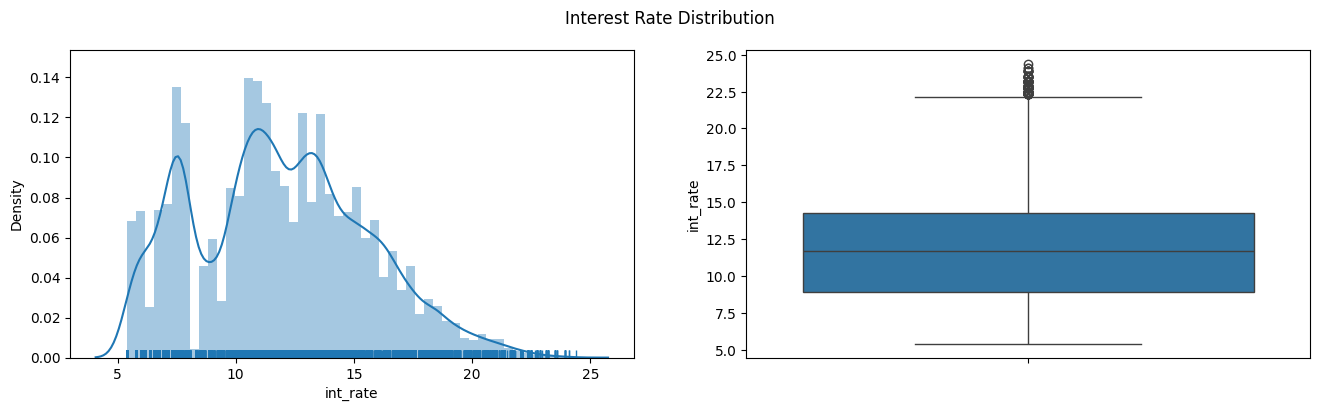

In [27]:
#Setting up the figure size of the plot
plt.figure(figsize=(16,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=loan_df.int_rate, rug=True)

#Setting subplot index
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.int_rate)
plt.suptitle('Interest Rate Distribution')
plt.show()

* Insights:From interest rate data, we can say that most of the interest rate lies between 8% to 14.5%.

### Analyzing Annual Income

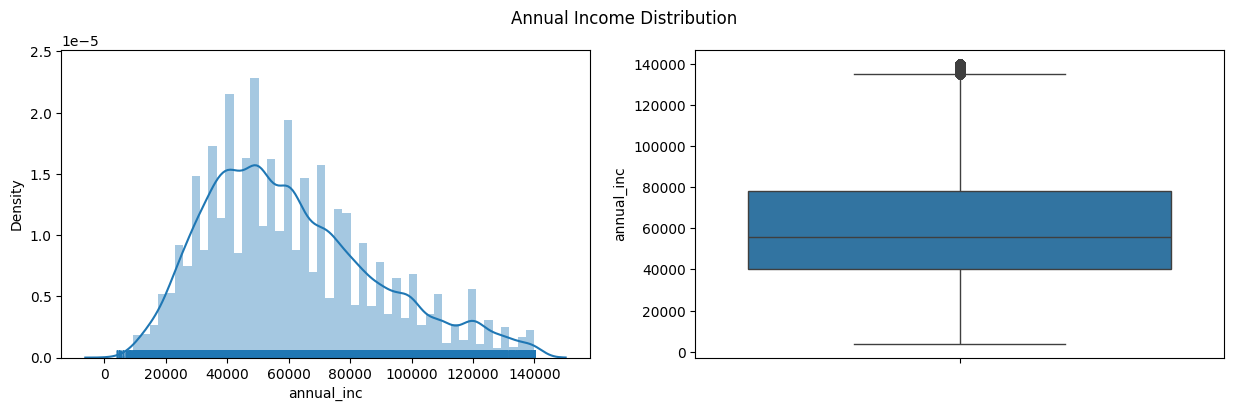

In [29]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=loan_df.annual_inc, rug=True)

#Setting subplot index
plt.subplot(1,2,2)
sns.boxplot(data=loan_df.annual_inc)
plt.suptitle('Annual Income Distribution')
plt.show()

* Insights: From annual income data, we can say that most of the borrower's annual income are in range of 40k to 80k.

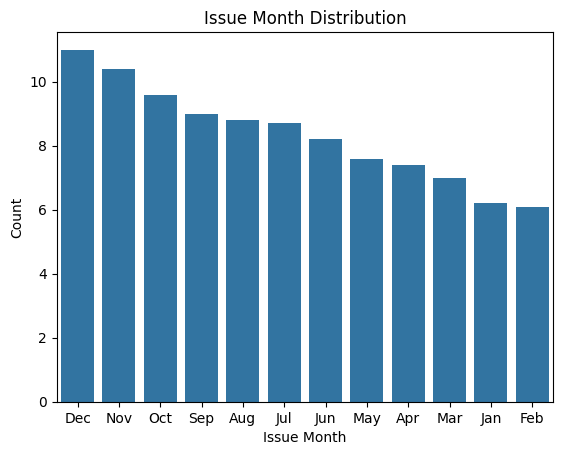

In [30]:
#converting value_count into percentage
ls = loan_df["issue_month"].value_counts(normalize=True).mul(100).round(1)
ls = ls.reset_index()
sns.barplot(data=ls,x=ls.issue_month,y=ls.proportion)
plt.xlabel("Issue Month")
plt.ylabel('Count')
plt.title('Issue Month Distribution')
plt.show()

* Insights: From issue month data, we can say that issue of loan is increasing every month from jan to dec and in the final quarter of year there are more loan issued due to vacation.

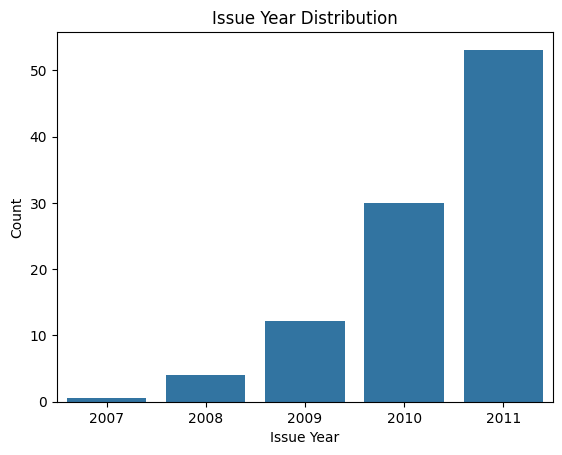

In [31]:
#converting value_count into percentage
ls = loan_df["issue_year"].value_counts(normalize=True).mul(100).round(1).reset_index()

#barplot
sns.barplot(data=ls, y=ls.proportion, x=ls.issue_year)
plt.xlabel("Issue Year")
plt.ylabel('Count')
plt.title('Issue Year Distribution')
plt.show()

* Insights: From issue year data, we can say that lending club has really expanded year by year, every year the number of loans are doubled.

### Analyzing Loan Status

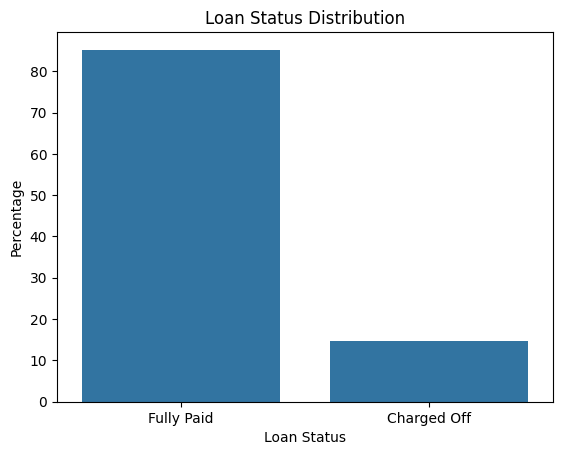

In [32]:
#converting value_count into percentage
loan_data = loan_df["loan_status"].value_counts(normalize=True).mul(100).round(1).reset_index()

#barplot
sns.barplot(data=ls, x=loan_data.loan_status,y=loan_data.proportion)
plt.xlabel("Loan Status")
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')
plt.show()

* Insights: From loan status data, we can say that 85.2% have fully paid whereas 14.8% are charged off.

### Analyzing Purpose of Loan

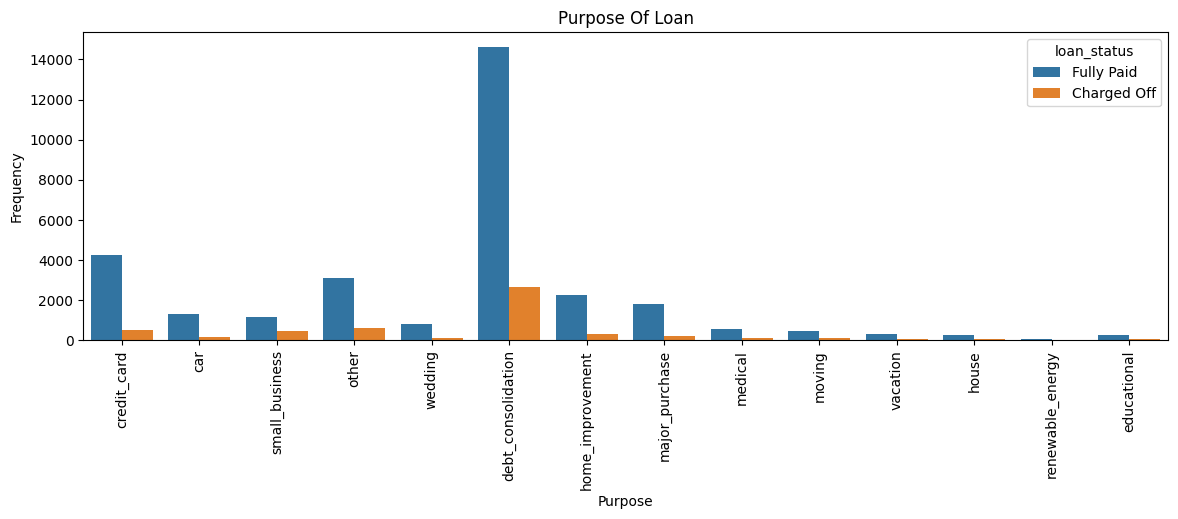

In [33]:
plt.figure(figsize=(14,4))
pic = sns.countplot(x="purpose", data=loan_df, hue= 'loan_status')
pic.set_title('Purpose Of Loan')
pic.set_ylabel('Frequency')
pic.set_xlabel('Purpose')  
plt.xticks(rotation=90)
plt.show()

* Insights: From purpose data, we can say that most of them have taken loan for debt consolidation and paying credit card bills.Charged Off loan status is also high for debt consolidation.

#### Analyzing Home Ownership

<Figure size 2000x600 with 0 Axes>

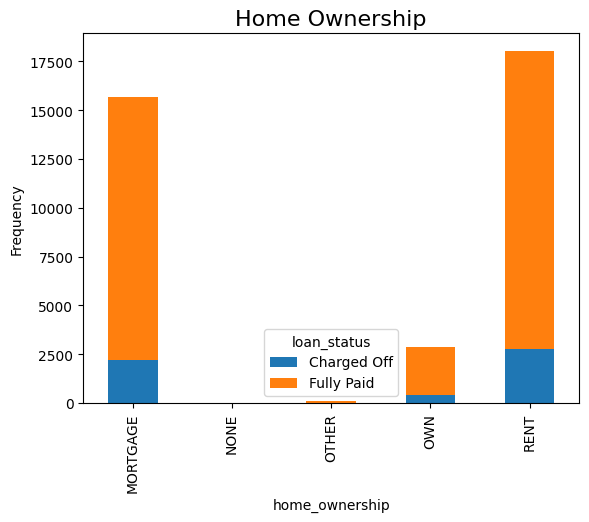

In [34]:
# Analyzing Home Ownership
plt.figure(figsize=(20,6))
loan_df.groupby('home_ownership')['loan_status'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.title("Home Ownership",fontdict={'fontsize':16})
plt.xlabel("home_ownership")
plt.ylabel("Frequency")
plt.show()

* Insights: From home ownership data, we can say that most of them have taken loan who are in rent or mortgage their home.
Charged Off loan status is also high for these two home ownership.

### Analyzing Loan paying term

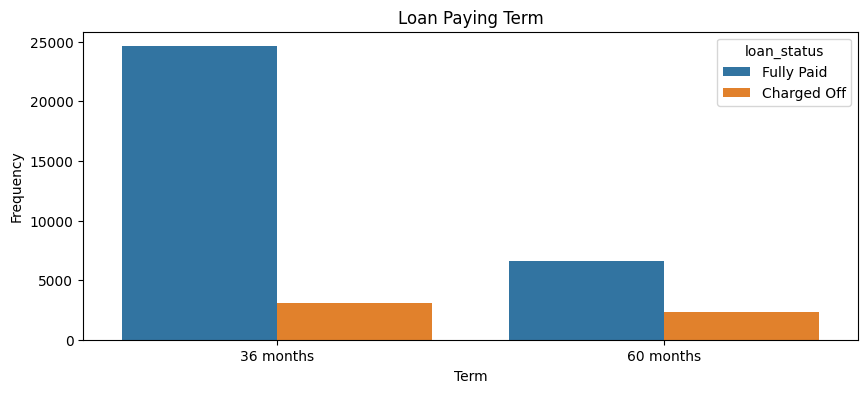

In [35]:
# Analyzing Loan paying term
plt.figure(figsize=(10,4))
ax = sns.countplot(x="term", data=loan_df, hue= 'loan_status')
ax.set_title('Loan Paying Term')
ax.set_ylabel('Frequency')
ax.set_xlabel('Term')  
plt.show()

* Insights: From term data, we can say that most of them have taken loan for 36 months as compared to 60 months.
Charged Off loan status is also high for 60 months term with respect to 36 months.

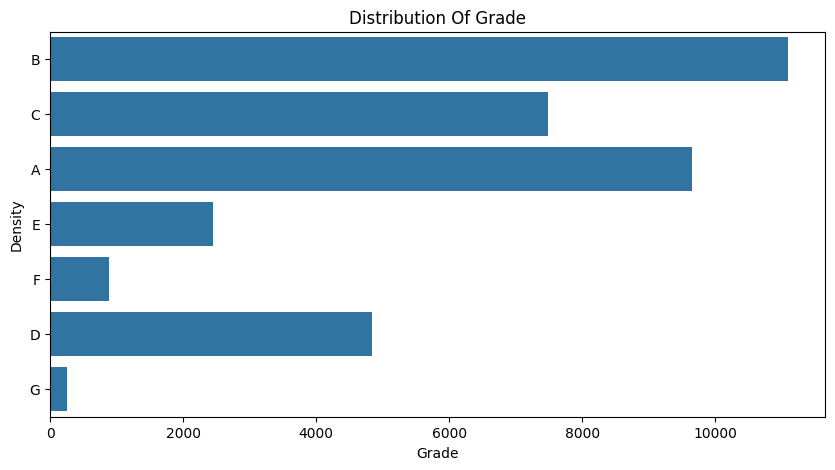

In [36]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(loan_df.grade)
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution Of Grade')
plt.show()

* Insights: A large amount of loans are with grade A and B commpared to rest showing most loans are high grade loans.

# Segmented Univariate Analysis

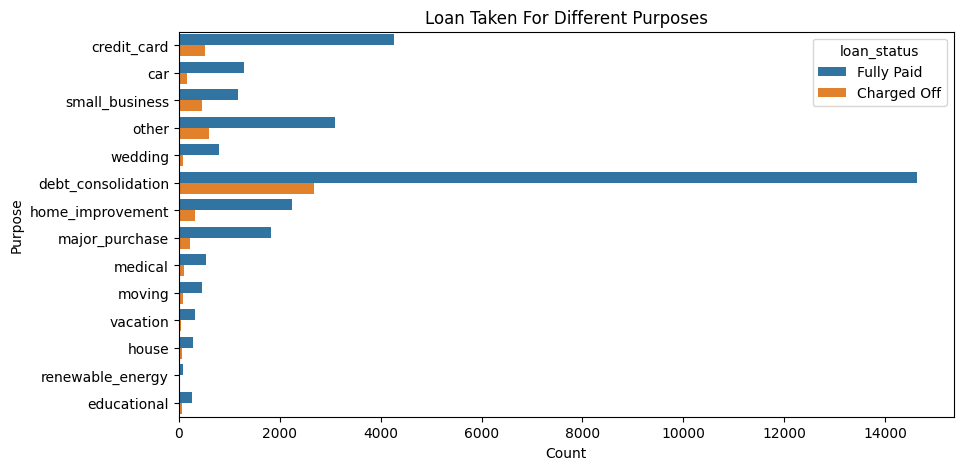

In [34]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

* Insights: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

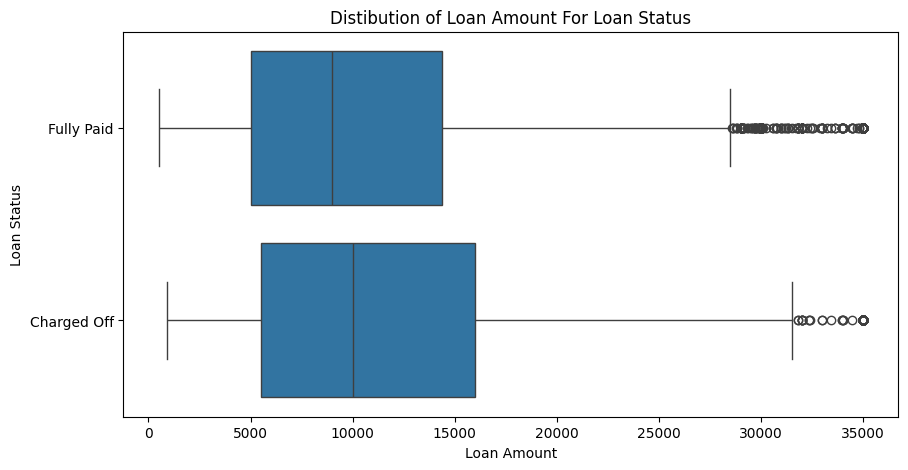

In [37]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

* Insights: The mean and 25% percentile are same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

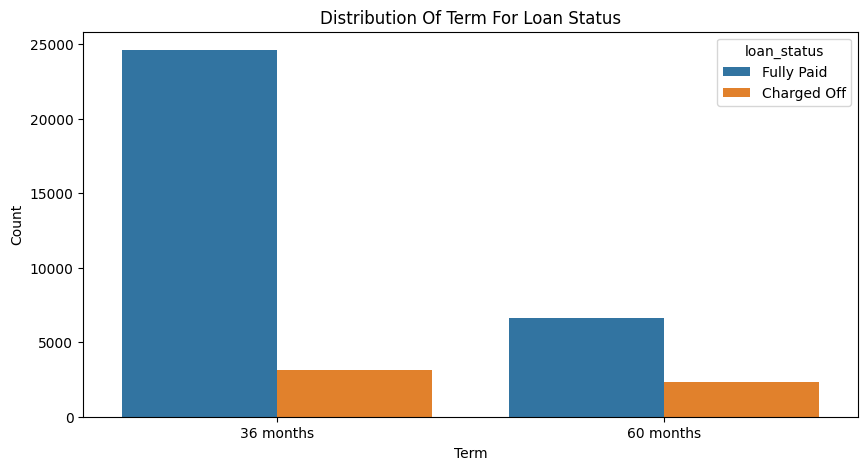

In [38]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution Of Term For Loan Status',fontsize=12)
plt.show()

* Insights: The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.

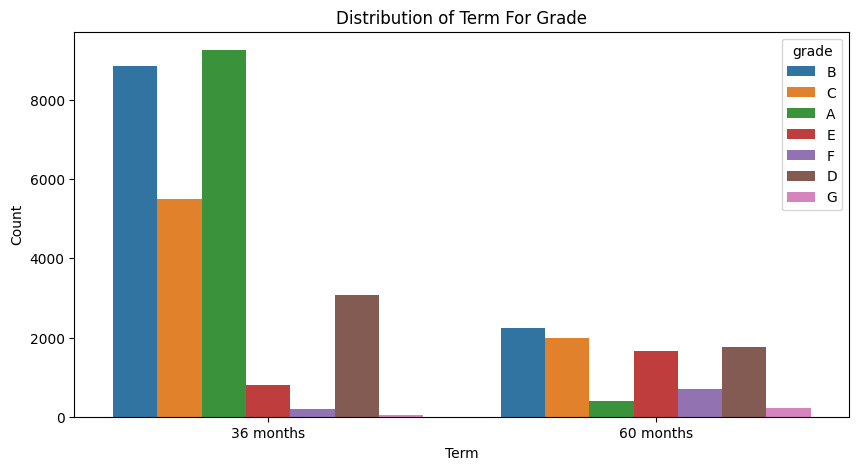

In [39]:
# Distribution of Term based on Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='term',hue='grade')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Grade',fontsize=12)
plt.show()

* Insights: The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.

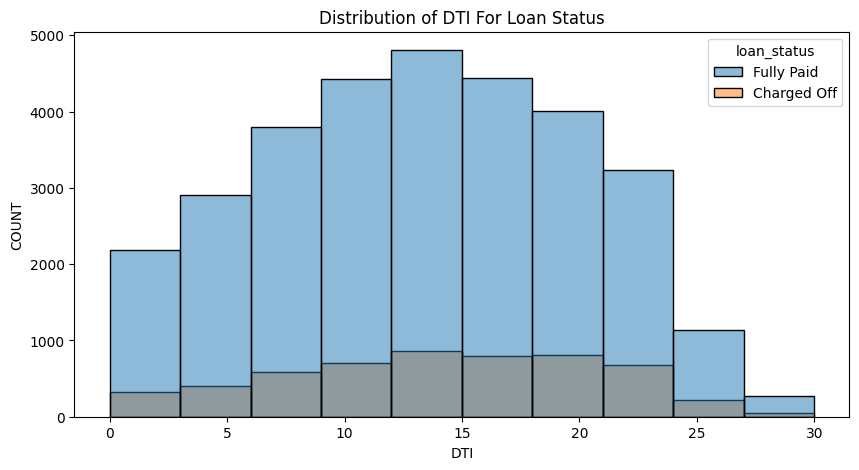

In [40]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('COUNT')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

* Insights: The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

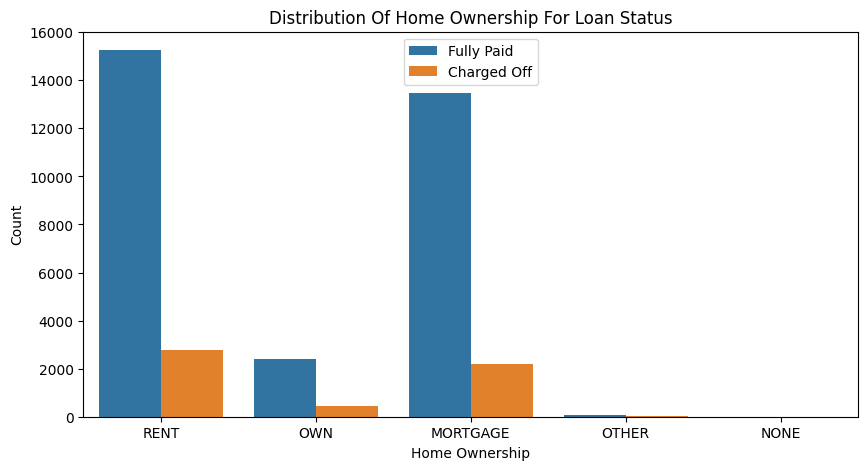

In [41]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution Of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

* Insights: The Defaulted loan are lower for the borrowers which own their property compared to on mortgage or rent.

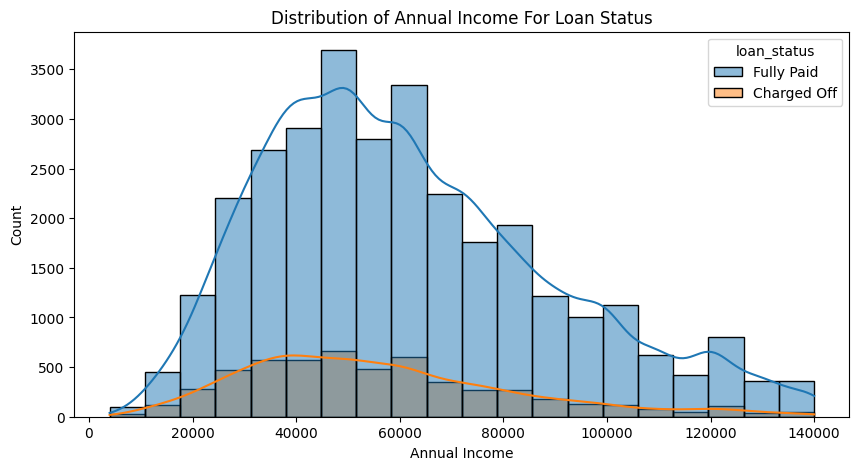

In [42]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

* Insights: Borrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

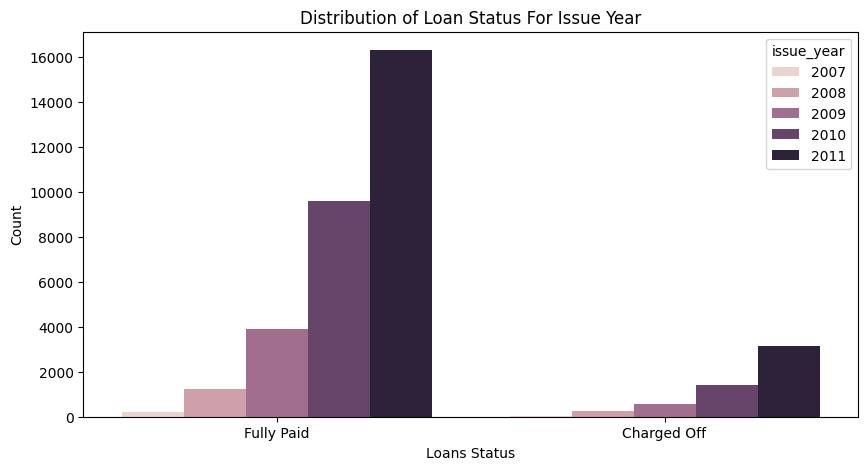

In [43]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

* Insights: The Fully paid loan are increasing exponentially with the time compared to defaulted loan.

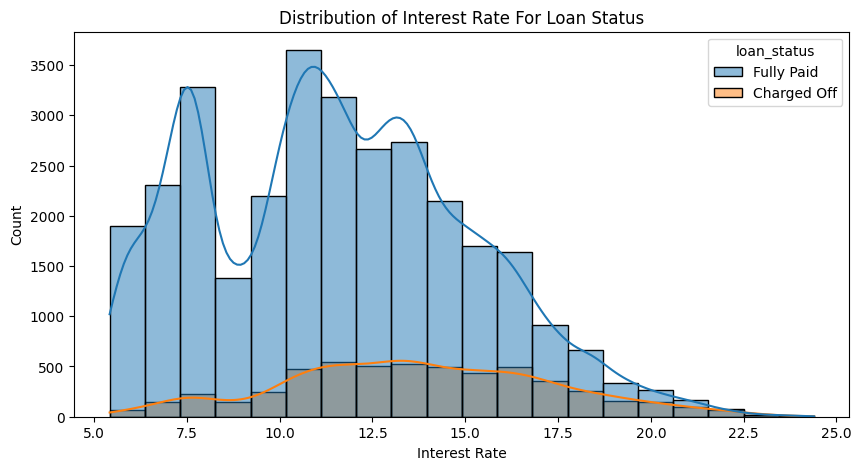

In [44]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

* Insights: The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.

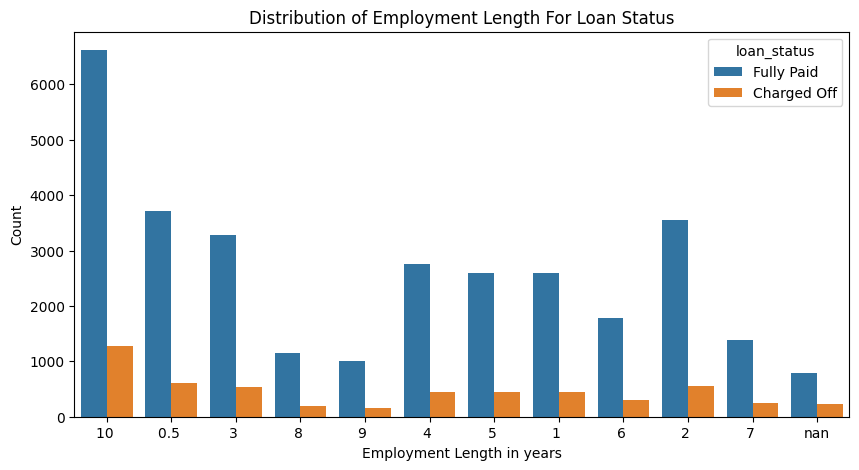

In [46]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

* Insights: The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

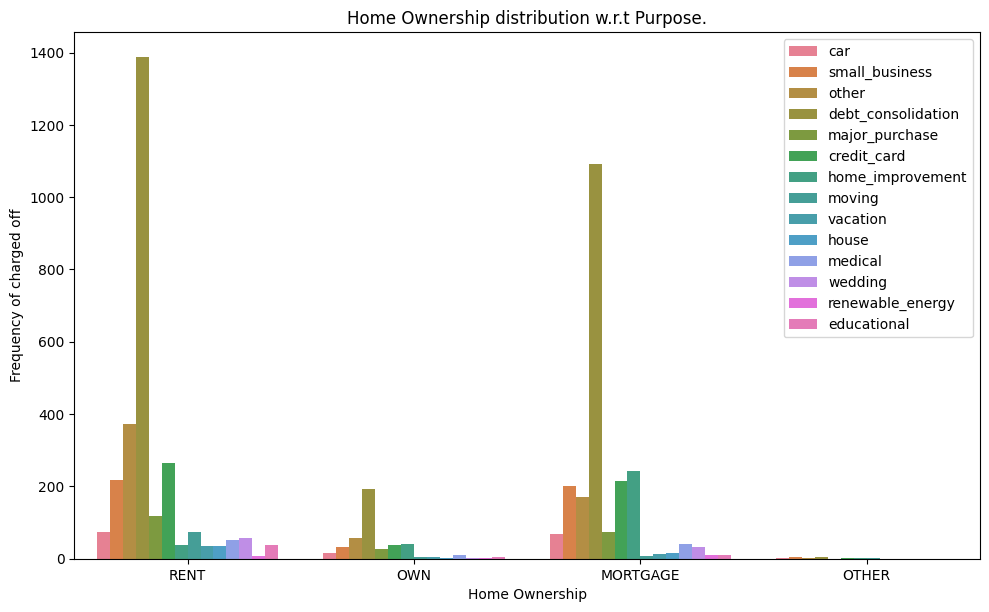

In [47]:
#home ownership and loan purpose for defaulted
plt.figure(figsize=(10,6))
sns.countplot(x='home_ownership',hue= 'purpose',data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.tight_layout()
plt.title("Home Ownership distribution w.r.t Purpose.")
plt.xlabel("Home Ownership")
plt.ylabel("Frequency of charged off")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

* Insights: From above chart we can say that, most of the borrower's who took loan for the purpose of debt consolidation has highest number of Charged off status and those who are in rent as the most.

### Bivariate Analysis

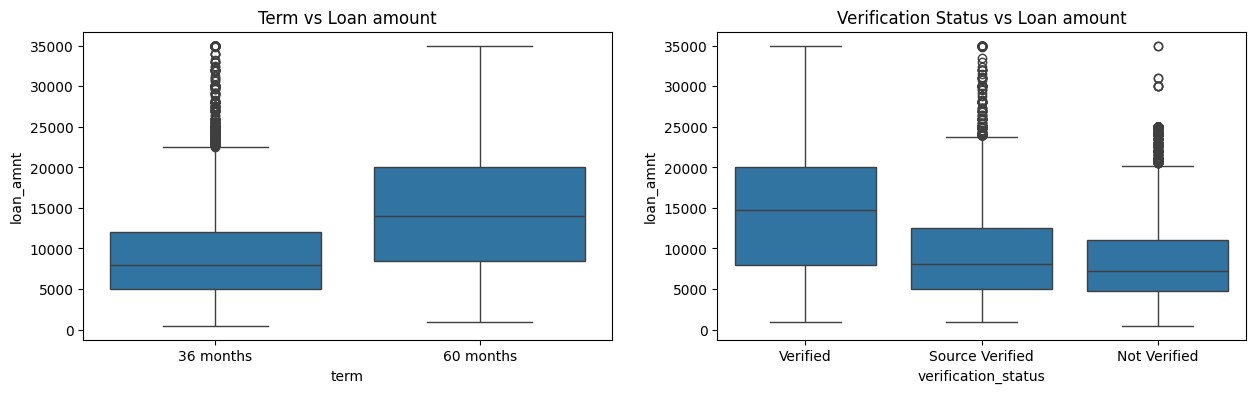

In [48]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="loan_amnt", data=loan_df)
plt.title("Term vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="loan_amnt", data=loan_df)
plt.title("Verification Status vs Loan amount")
plt.show()

# Insights:
  * In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. 
  Its median is only 15k whereas the median of 36 month is 8k.
  * In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

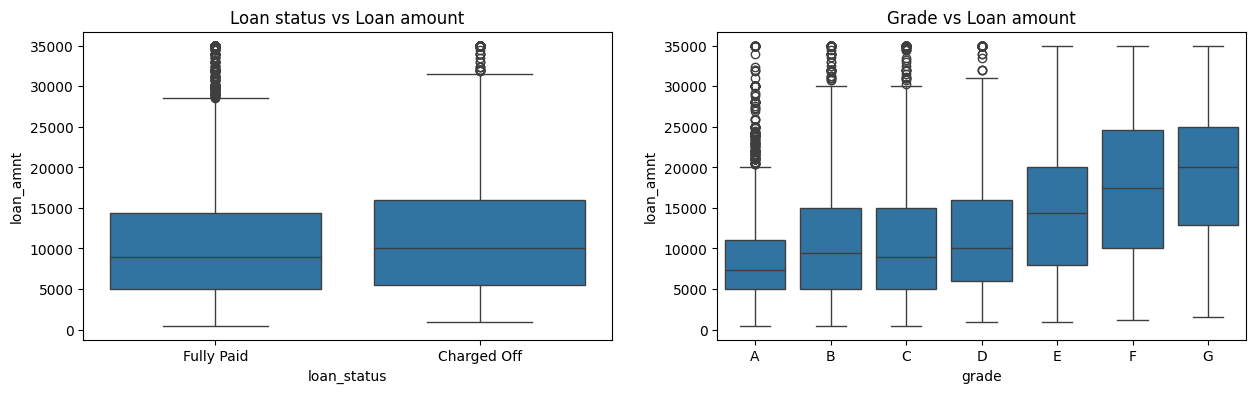

In [49]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="loan_amnt", data=loan_df)
plt.title("Loan status vs Loan amount")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="loan_amnt", order= grade_order, data=loan_df)
plt.title("Grade vs Loan amount")
plt.show()

## Insights
* In loan amount vs Loan status variable we can say that, charged off were having higher loan amount than fully paid.
* In Grade vs loan amount we can say that, grade F & G are having max amount of loan. As the grade decreases amount of loan is increasing.
From this we can say that higher the grade more is the risk of default.

Text(0.5, 1.0, 'Home Ownership vs Loan amount')

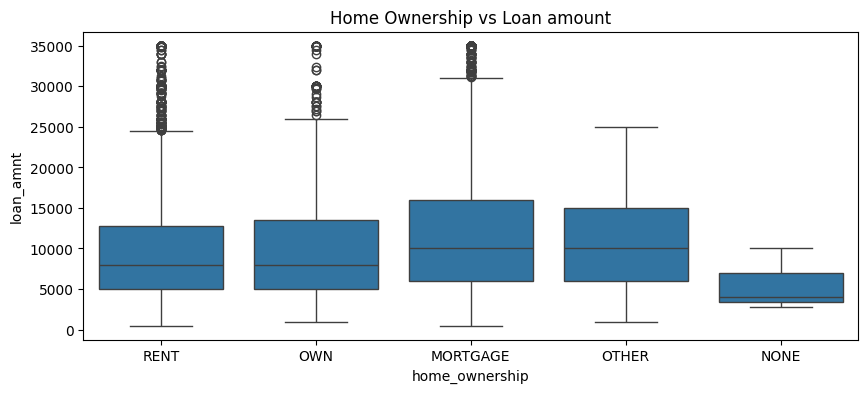

In [50]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="loan_amnt", data=loan_df)
plt.title("Home Ownership vs Loan amount")

* Insights:In loan amount vs home ownership variable we can say that, the borrower who are from Mortgage have taken higher amount of loan then others.

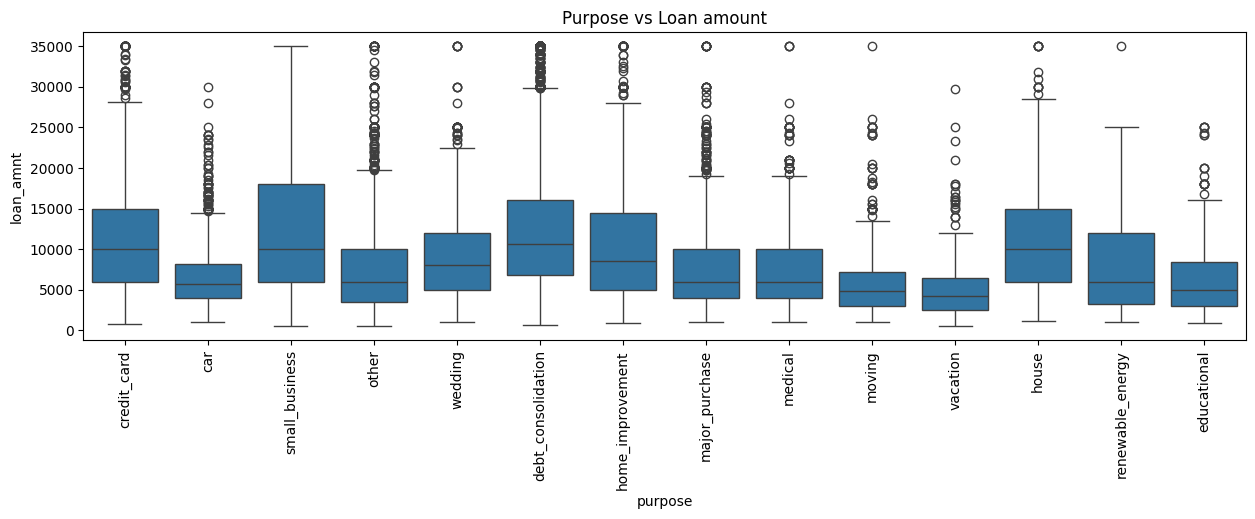

In [51]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="loan_amnt", data=loan_df)
plt.title("Purpose vs Loan amount")
plt.xticks(rotation=90)
plt.show()

* Insights: In loan amount vs employee length variable we can say that, the borrower who has 10+ years of experience are taking high amount of loan than others and borrowers with less than 1 year of experience are taking lesser amount of loan compared to others.

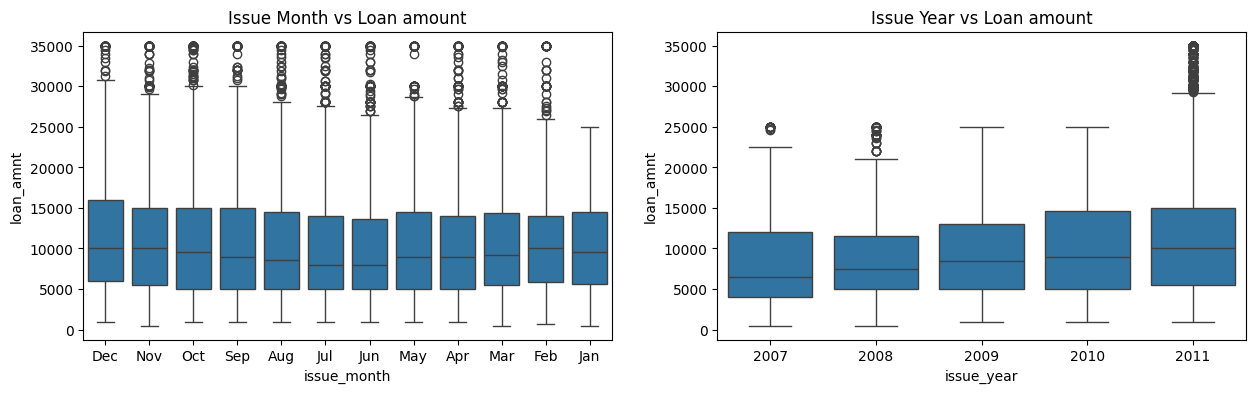

In [52]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_month", y="loan_amnt", data=loan_df)
plt.title("Issue Month vs Loan amount")
plt.subplot(1,2,2)
sns.boxplot(x="issue_year", y="loan_amnt", data=loan_df)
plt.title("Issue Year vs Loan amount")
plt.show()

## Insights:
* In loan amount vs issue month variable we can say that, highest loan amount is taken in the month of Dec and May whereas median value doesn't vary too much.
* In Issue year vs loan amount we can say that, highest loan amount is taken in the year 2008 and 2011 as we can see in outliers by some borrowers. And we can say that median value doesn't vary too much but as the year increases high amount of loans are taken.

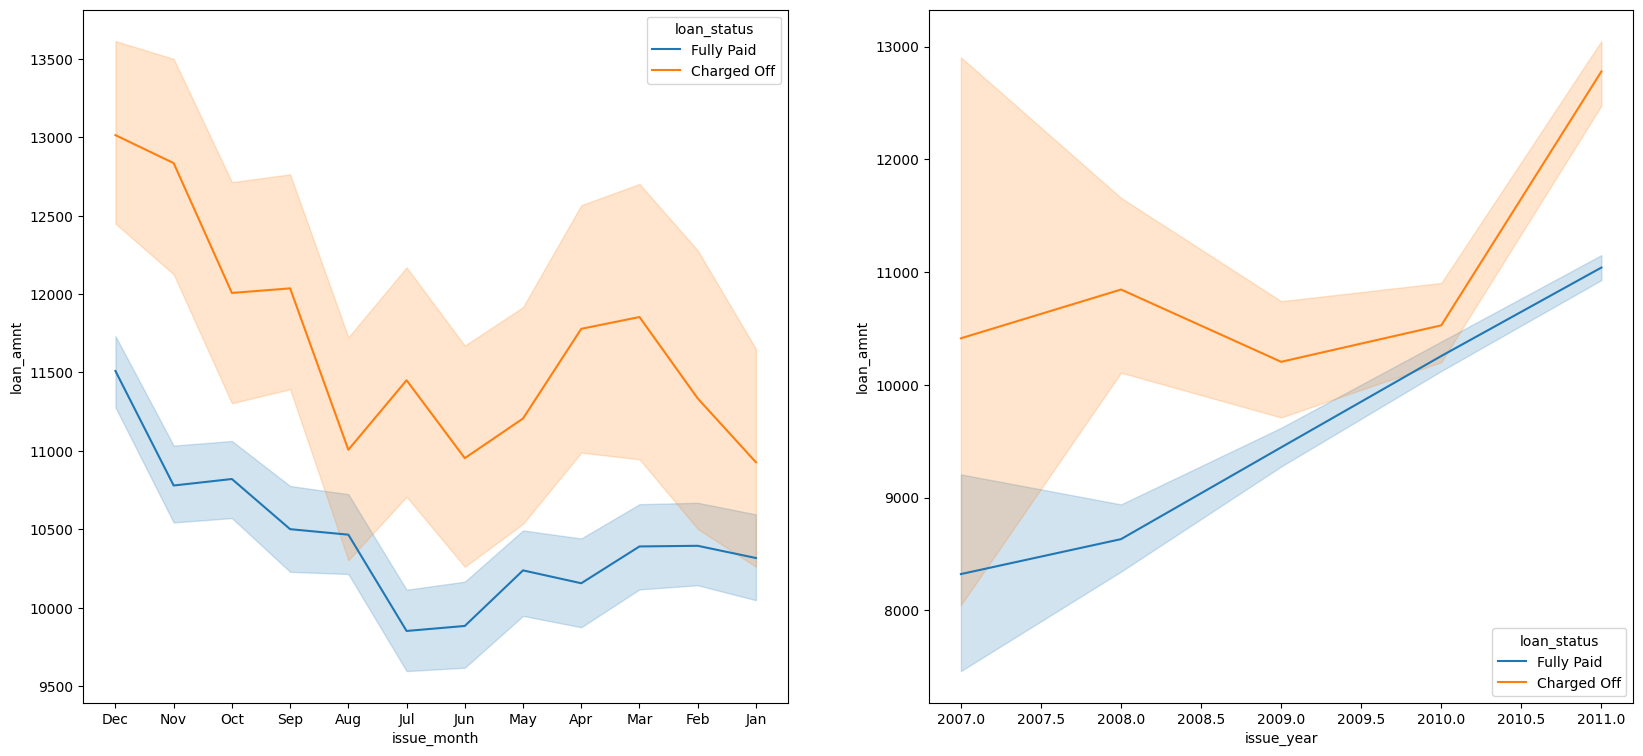

In [53]:
plt.figure(figsize=(20,9))
plt.subplot(121)
sns.lineplot(data =loan_df ,y='loan_amnt', x='issue_month', hue ='loan_status')
plt.subplot(122)
sns.lineplot(data =loan_df ,y='loan_amnt', x='issue_year', hue ='loan_status')
plt.show()

* Insights:From above lineplot we can say that, higher the loam amount, more is the charged off frequency And the borrower who took the loan in the month of november and december are having highest charged off ratio with highest loan amount.


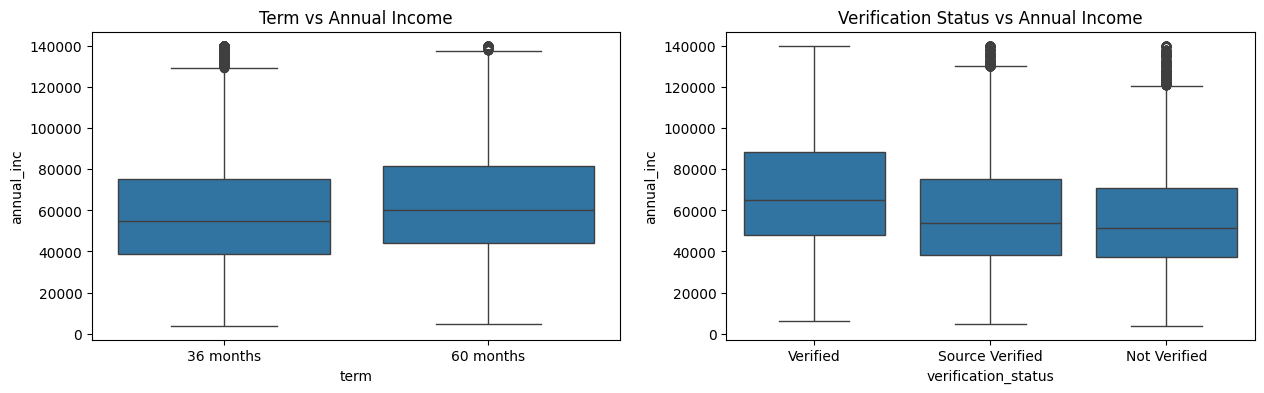

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="annual_inc", data=loan_df)
plt.title("Term vs Annual Income")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="annual_inc", data=loan_df)
plt.title("Verification Status vs Annual Income")
plt.show()

* Insights: In Term vs Annual Income variable we can say that, the borrowers who have high annual income are taking loans for 60 months tenure as compared to 36 months. In Verification status vs annual income we can say that, mostly the verified borrowers are having high annual income than others.

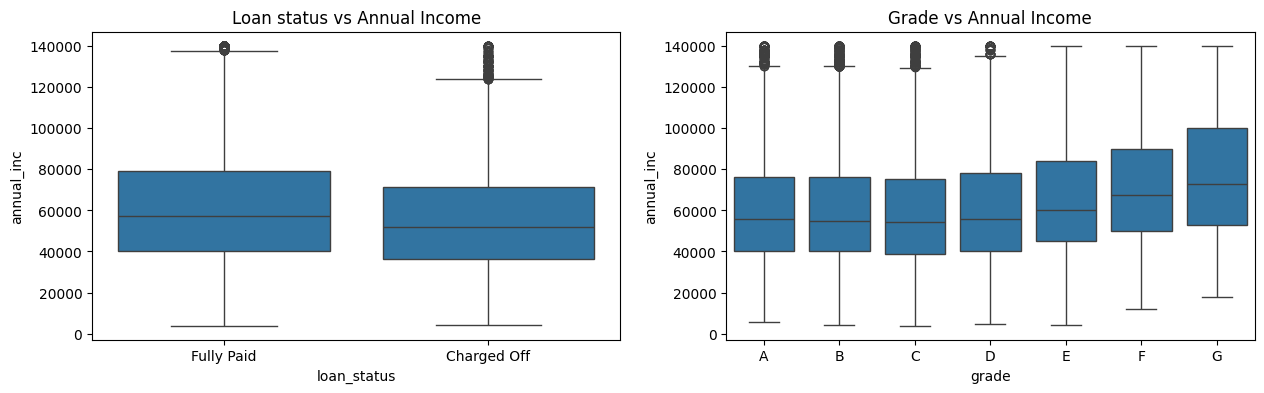

In [55]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="annual_inc", data=loan_df)
plt.title("Loan status vs Annual Income")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="annual_inc", order= grade_order, data=loan_df)
plt.title("Grade vs Annual Income")
plt.show()

* Insights:In loan amount vs term variable we can say that, more the loan amount higher is the tenure i.e. 60 months. Its median is only 15k whereas the median of 36 month is 8k.
In Verification status vs loan amount we can say that, Verified borrower gets more loan amount than Non-verified and Source Verified i.e. above 10k loan amount everyone are verified.

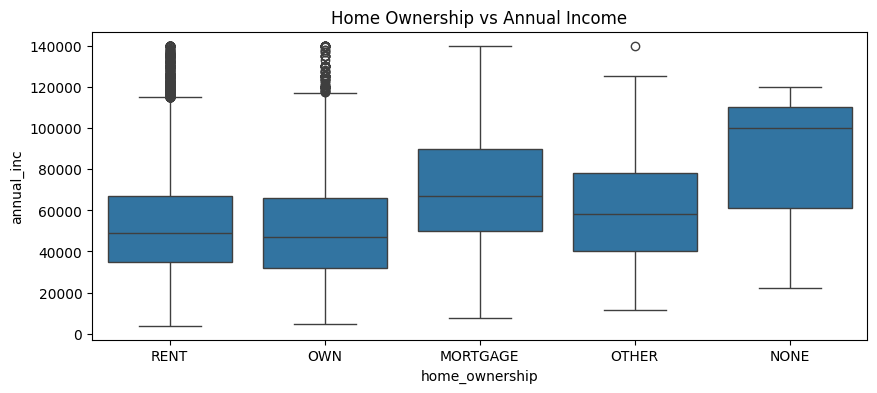

In [56]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="annual_inc", data=loan_df)
plt.title("Home Ownership vs Annual Income")
plt.show()

* Insights:In Annual Income vs Home Ownership variable we can say that, the borrowers who have the status as Mortgage are having high annual income than others.

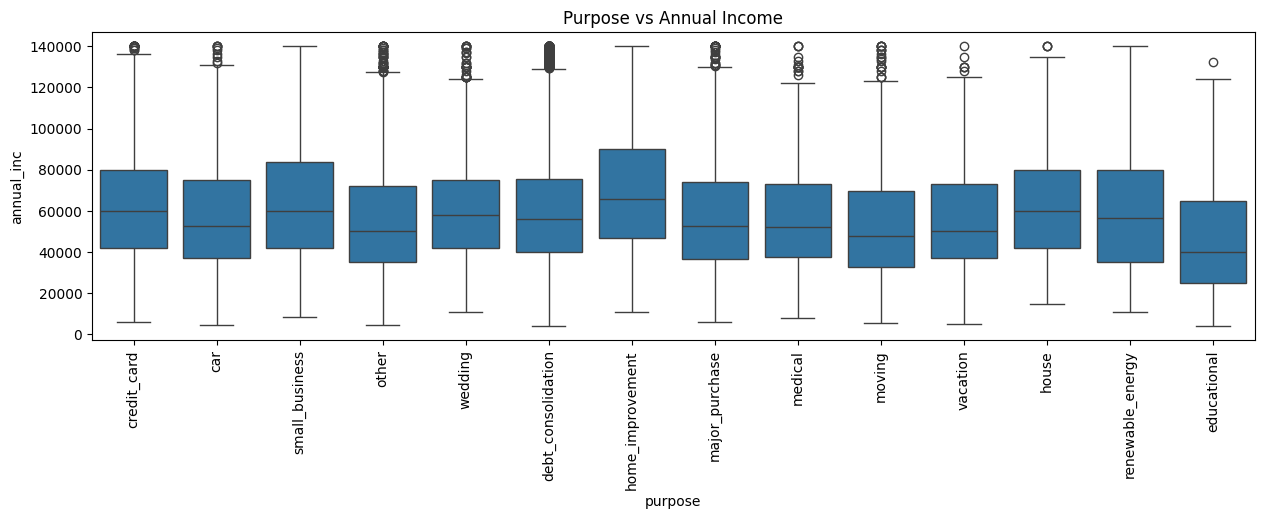

In [57]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="annual_inc", data=loan_df)
plt.title("Purpose vs Annual Income")
plt.xticks(rotation=90)
plt.show()

Insights:In Annual Income vs Purpose variable we can say that, the borrowers who has high annual income are taking loans mostly for home improvement and small business.

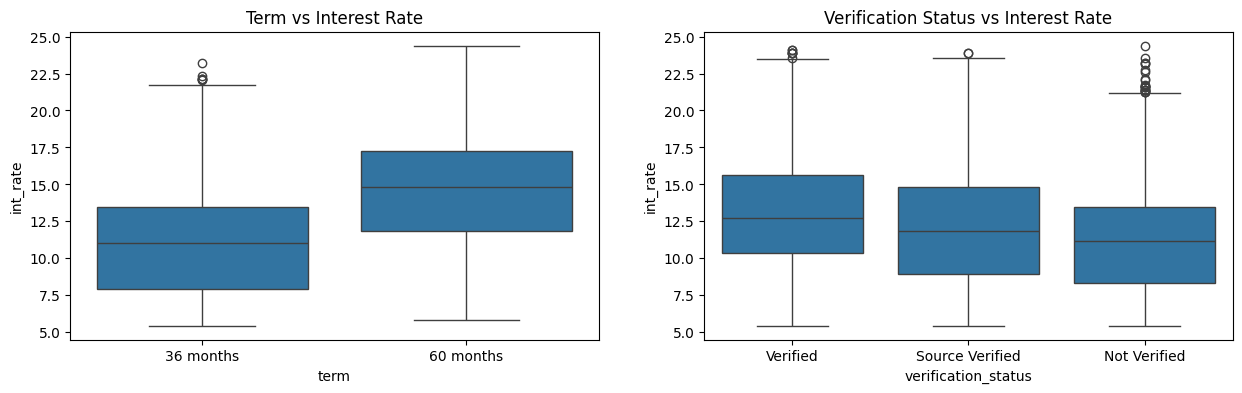

In [58]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="term", y="int_rate", data=loan_df)
plt.title("Term vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="verification_status", y="int_rate", data=loan_df)
plt.title("Verification Status vs Interest Rate")
plt.show()

## Insights
* In term vs interest rate variable we can say that, interest rate is less for those who take loan for 36 months and high for 60 months.
* In term vs interest rate variable we can say that, Verified borrower gets more loan at higher interest rate compared to others.

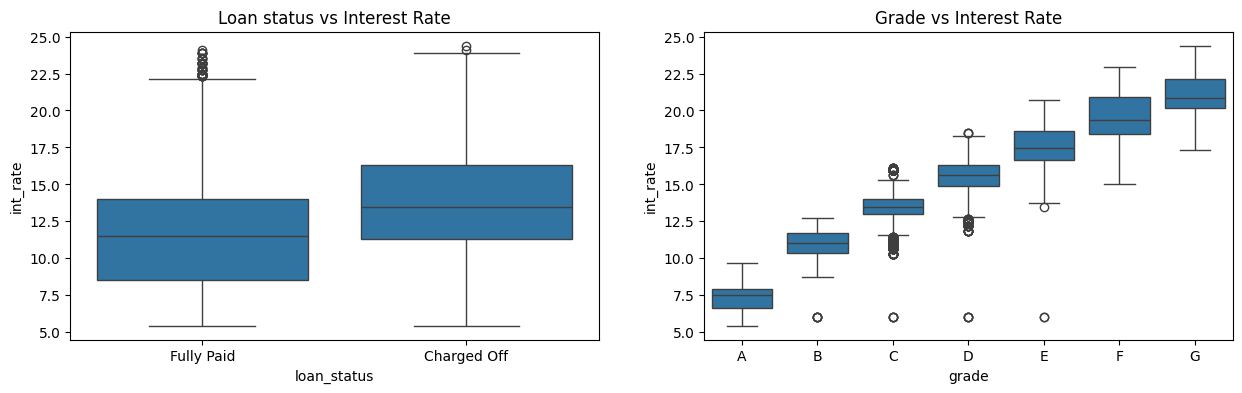

In [60]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="loan_status", y="int_rate", data=loan_df)
plt.title("Loan status vs Interest Rate")
plt.subplot(1,2,2)
#arranging grade in alphabetically ascending order
grade_order = loan_df["grade"].unique()
grade_order.sort()
sns.boxplot(x="grade", y="int_rate", order= grade_order, data=loan_df)
plt.title("Grade vs Interest Rate")
plt.show()

# Insights
* In loan status vs interest rate variable we can say that, the borrowers who has high interest rate are mostly defaulters.
* In grade vs interest rate we can say that, as the grade decreases, interest rate is also increasing.

Text(0.5, 1.0, 'Home Ownership vs Interest Rate')

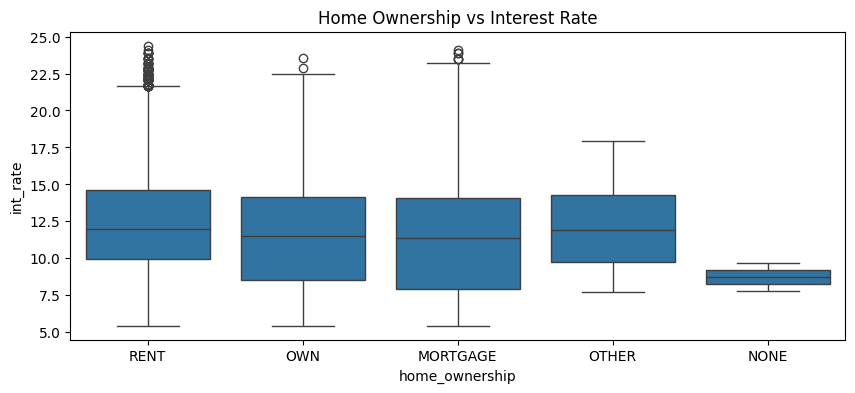

In [61]:
plt.figure(figsize=(10,4))
sns.boxplot(x="home_ownership", y="int_rate", data=loan_df)
plt.title("Home Ownership vs Interest Rate")

* Insights: In home ownership vs interest rate variable we can say that, the borrowers who are in rent are getting high interest rate. The borrowers with own and mortgage are getting loan with less interest rate also due to security purpose.

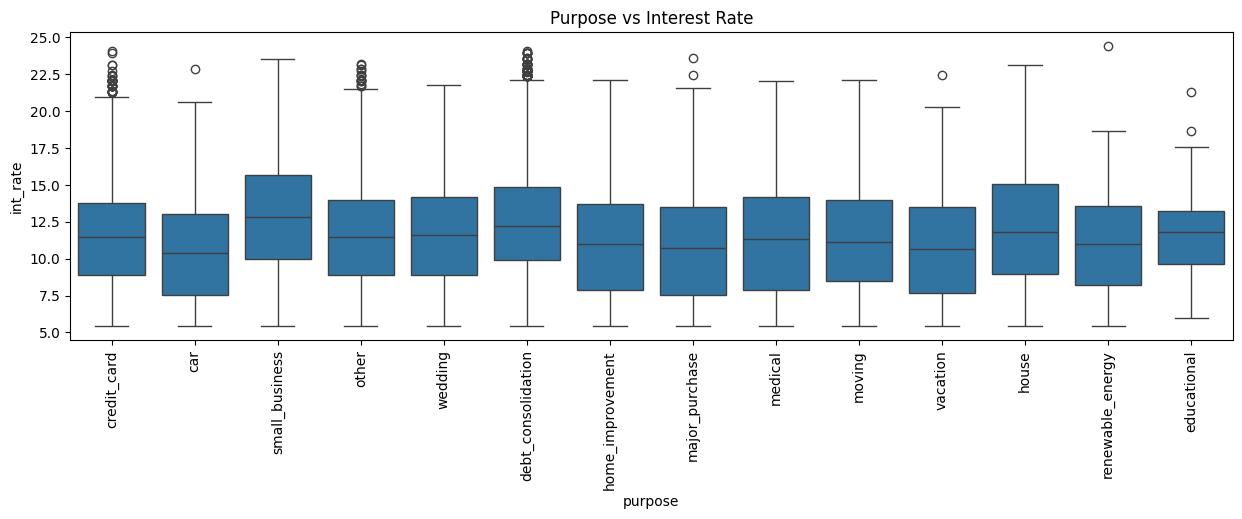

In [62]:
plt.figure(figsize=(15,4))
sns.boxplot(x="purpose", y="int_rate", data=loan_df)
plt.title("Purpose vs Interest Rate")
plt.xticks(rotation=90)
plt.show()

* Insights: In purpose vs interest rate variable we can say that, small business , debt consolidation and house loan are geeting loan at high interest rate than others.

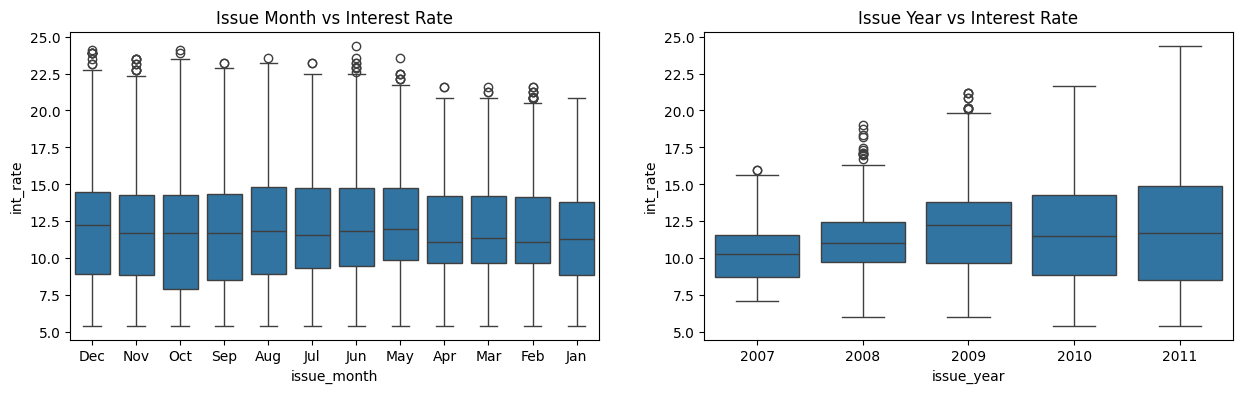

In [63]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(x="issue_month", y="int_rate", data=loan_df)
plt.title("Issue Month vs Interest Rate")
plt.subplot(1,2,2)
sns.boxplot(x="issue_year", y="int_rate", data=loan_df)
plt.title("Issue Year vs Interest Rate")
plt.show()

* Insights: In interest rate vs term variable we can say that, dti ratio is high for the borrower who has 60 months tenure.
In Verification status vs dti we can say that, verified borrowers are having high dti ratio.

## Multivariate Analysis

In [67]:

columns = ['verification_status','loan_status','pymnt_plan','purpose','addr_state','initial_list_status','issue_month'
           ,'sub_grade','home_ownership','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt',
           'tax_liens','term','grade']

loan_df = loan_df.drop(columns=columns)

In [68]:
# Proceed with the correlation calculation

corr_matrix = loan_df.corr()
corr_matrix

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,issue_d,dti,pub_rec_bankruptcies,issue_year,approved_loan_amt_percent
id,1.000000,0.115408,0.126287,0.227844,0.050130,0.071176,0.111542,0.032832,0.934102,0.093361,-0.006499,0.846251,0.408196
loan_amnt,0.115408,1.000000,0.981942,0.936925,0.291189,0.931481,0.150711,0.403197,0.116672,0.090313,-0.029698,0.105214,-0.111166
funded_amnt,0.126287,0.981942,1.000000,0.954850,0.296182,0.957113,0.150301,0.399030,0.124246,0.089510,-0.030696,0.116364,-0.041872
funded_amnt_inv,0.227844,0.936925,0.954850,1.000000,0.288787,0.902641,0.161474,0.382429,0.260765,0.097070,-0.035393,0.249812,0.192343
int_rate,0.050130,0.291189,0.296182,0.288787,1.000000,0.269193,-0.002857,0.054022,0.041247,0.111683,0.087167,0.034866,0.020649
installment,0.071176,0.931481,0.957113,0.902641,0.269193,1.000000,0.121808,0.398193,0.054655,0.079392,-0.027085,0.048062,-0.054533
emp_length,0.111542,0.150711,0.150301,0.161474,-0.002857,0.121808,1.000000,0.195884,0.121642,0.057566,0.067160,0.119316,0.046710
annual_inc,0.032832,0.403197,0.399030,0.382429,0.054022,0.398193,0.195884,1.000000,0.041654,-0.072641,-0.005844,0.038862,-0.035776
issue_d,0.934102,0.116672,0.124246,0.260765,0.041247,0.054655,0.121642,0.041654,1.000000,0.094264,-0.005414,0.950675,0.549796
dti,0.093361,0.090313,0.089510,0.097070,0.111683,0.079392,0.057566,-0.072641,0.094264,1.000000,0.003936,0.092832,0.028488


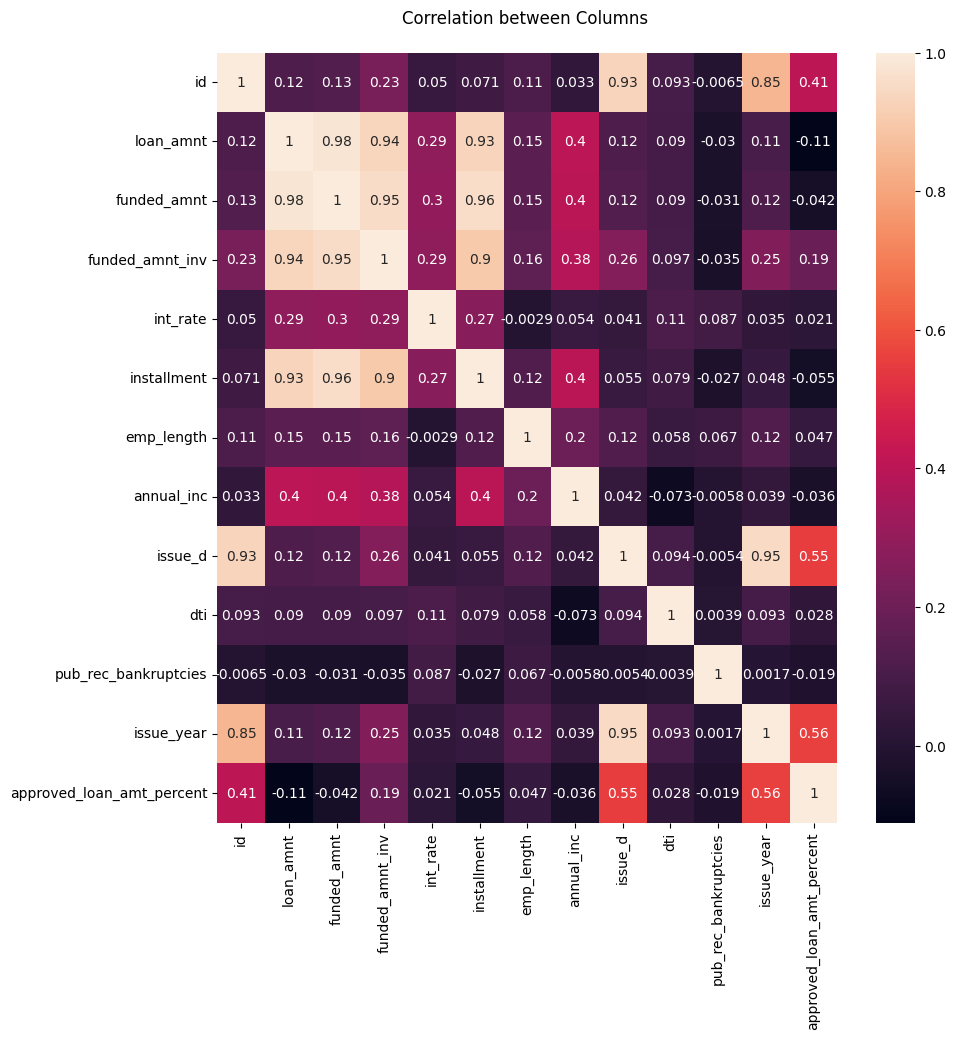

In [70]:
#finding correlation matrix
data_correlation = loan_df.corr()
#plotting correaltion matrix on clustermap
#sns.clustermap(data_correlation,annot=True,figsize=(14, 8))

# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr(),annot=True)
plt.title("Correlation between Columns \n")

plt.show()


##Insights
* loan_amnt , funded_amnt , funded_amnt_inv , installment are strongly correlated.
* annual_inc and dti is negatively correlated.
* Debt income ratio is the percentage of a borrower's monthly gross income that goes toward paying debts.
* Which means when annual_inc is low, debt is high and vice versa.

In [65]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: '36 months'

<Figure size 1000x1000 with 0 Axes>